<a href="https://colab.research.google.com/github/viswambhar-yasa/AuToDiFf/blob/main/Evaluate_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing the optimizers to check whether they are optimizing the Rosenbrock function whose minima is known to be at [-1,-1] 
and plotting their trajectory 

In [1]:
from os.path import join
from google.colab import drive

ROOT = "/content/drive"
drive.mount(ROOT)

!git clone https://github.com/viswambhar-yasa/AuToDiFf "/content/drive/My Drive/AutoDiff"

Mounted at /content/drive
fatal: destination path '/content/drive/My Drive/AutoDiff' already exists and is not an empty directory.


In [2]:
ls

drive/  sample_data/


In [3]:
import sys,os
sys.path.append('/content/drive/MyDrive/AutoDiff/')

In [4]:
ls

drive/  sample_data/


In [5]:
cd /content/drive/MyDrive/AutoDiff/

/content/drive/MyDrive/AutoDiff


In [11]:
from optimizers import *
import numpy as np
from NN_architecture import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [12]:

def func_rb(x):
  '''
  CITATION: Taken from Parameter Identification in Non-Linear Solid Mechanics Excercise 3
  ======================================================================
  objective function (Rosenbrook)
  ----------------------------------------------------------------------
  x: parameter vector x=np.array([x0,x1])
  ======================================================================
  '''
  f=(1-x[0])**2 + 100*(x[1]-x[0]**2)**2
  return f
#
def grad_rb(x):
  '''
  CITATION: Taken from Parameter Identification in Non-Linear Solid Mechanics Excercise 3
  ======================================================================
  gradient of objective function (Rosenbrook)
  ----------------------------------------------------------------------
  x: parameter vector x=np.array([x0,x1])
  ======================================================================
  '''
  dfdx0=2*(200*x[0]**3-200*x[0]*x[1]+x[0]-1)
  dfdx1=200*(x[1]-x[0]**2)
  g=np.array([dfdx0,dfdx1])
  return g
#Plotting all the optimizers


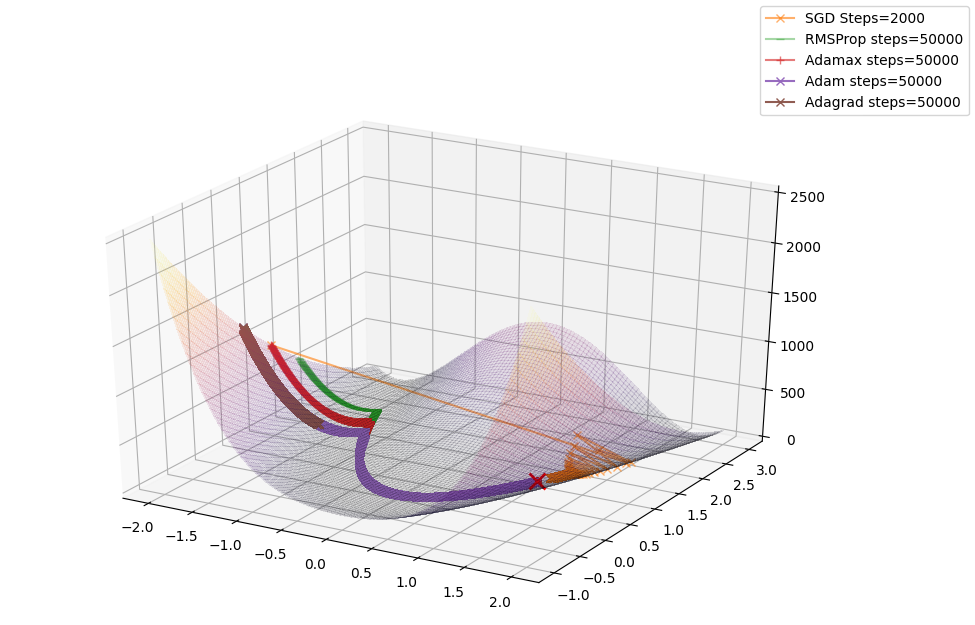

In [13]:
x = np.linspace(-2,2,100)
y = np.linspace(-1,3,100)
X,Y = np.meshgrid(x,y)
Z = func_rb([X,Y])
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.inferno,
         linewidth=0, antialiased=False,alpha=0.1 )

start=[-2,1]
x_plot=[]
y_plot=[]
z_plot=[]
x_plot.append(start[0])
y_plot.append(start[1])
z_plot.append(func_rb(start))
iter = 2000
SG = SGD()
for i in range(iter):
    new=SG(start,grad_rb(start))
    x_plot.append(new[0])
    y_plot.append(new[1])
    z_plot.append(func_rb(new))
    start = new
ax.plot(x_plot,y_plot,z_plot,marker="x",label="SGD Steps=2000",alpha=100)




start=[-2,1.5]
x_plot=[]
y_plot=[]
z_plot=[]
x_plot.append(start[0])
y_plot.append(start[1])
z_plot.append(func_rb(start))
iter = 50000
M = RMSProp(2)
for i in range(iter):
    new=M(start,grad_rb(start))
    x_plot.append(new[0])
    y_plot.append(new[1])
    z_plot.append(func_rb(new))
    start = new
ax.plot(x_plot,y_plot,z_plot,marker="_",label="RMSProp steps=50000",alpha=150)



start=[-2,1]
x_plot=[]
y_plot=[]
z_plot=[]
x_plot.append(start[0])
y_plot.append(start[1])
z_plot.append(func_rb(start))
iter = 50000
M = Adamax(2)
for i in range(iter):
    new=M(start,grad_rb(start))
    x_plot.append(new[0])
    y_plot.append(new[1])
    z_plot.append(func_rb(new))
    start = new
ax.plot(x_plot,y_plot,z_plot,marker="+",label="Adamax steps=50000",alpha=100)

start=[-2,0.5]
x_plot=[]
y_plot=[]
z_plot=[]
x_plot.append(start[0])
y_plot.append(start[1])
z_plot.append(func_rb(start))
iter = 50000
M = Adam(2)
for i in range(iter):
    new=M(start,grad_rb(start))
    x_plot.append(new[0])
    y_plot.append(new[1])
    z_plot.append(func_rb(new))
    start = new
ax.plot(x_plot,y_plot,z_plot,marker="x",label="Adam steps=50000",alpha=10)


start=[-2,0.5]
x_plot=[]
y_plot=[]
z_plot=[]
x_plot.append(start[0])
y_plot.append(start[1])
z_plot.append(func_rb(start))
iter = 50000
M = Adagrad(2)
for i in range(iter):
    new=M(start,grad_rb(start))
    x_plot.append(new[0])
    y_plot.append(new[1])
    z_plot.append(func_rb(new))
    start = new
ax.plot(x_plot,y_plot,z_plot,marker="x",label="Adagrad steps=50000",alpha=10)

ax.plot([1],[1],func_rb([1,1]),color='red',marker='x',linewidth=2,markersize=12,markeredgewidth=2)

fig.legend()